In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from PIL import Image
from sklearn.model_selection import train_test_split

In [43]:
train_dir = "OneDrive/Desktop/DL COdes/6 Pneumonia_X_Ray/train"
test_dir ="OneDrive/Desktop/DL COdes/6 Pneumonia_X_Ray/test"

In [44]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [45]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_gen = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=128,class_mode='binary')

Found 2040 images belonging to 2 classes.


In [47]:
test_gen = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=128,class_mode='binary')

Found 484 images belonging to 2 classes.


In [48]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


C:\Users\payal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(train_gen,epochs = 5 , steps_per_epoch=train_gen.samples , validation_data=test_gen,validation_steps=test_gen.samples)

C:\Users\payal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
  16/2040 ━━━━━━━━━━━━━━━━━━━━ 3:09:51 6s/step - accuracy: 0.7241 - loss: 0.4947

C:\Users\payal\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2040/2040 ━━━━━━━━━━━━━━━━━━━━ 110s 50ms/step - accuracy: 0.8208 - loss: 0.4512 - val_accuracy: 0.5165 - val_loss: 0.9701
Epoch 2/5
2040/2040 ━━━━━━━━━━━━━━━━━━━━ 91s 42ms/step - accuracy: 0.8602 - loss: 0.4129 - val_accuracy: 0.5165 - val_loss: 0.8977
Epoch 3/5
2040/2040 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.8603 - loss: 0.3751 - val_accuracy: 0.5165 - val_loss: 0.6303
Epoch 4/5
  16/2040 ━━━━━━━━━━━━━━━━━━━━ 1:07:50 2s/step - accuracy: 0.8637 - loss: 0.3068

KeyboardInterrupt: 

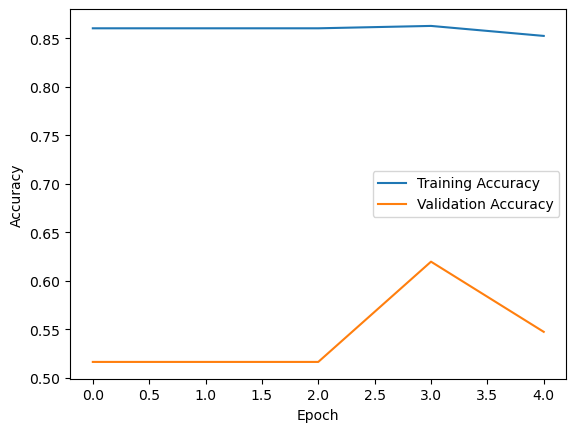

In [55]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [59]:
predictions = model.predict(test_gen)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


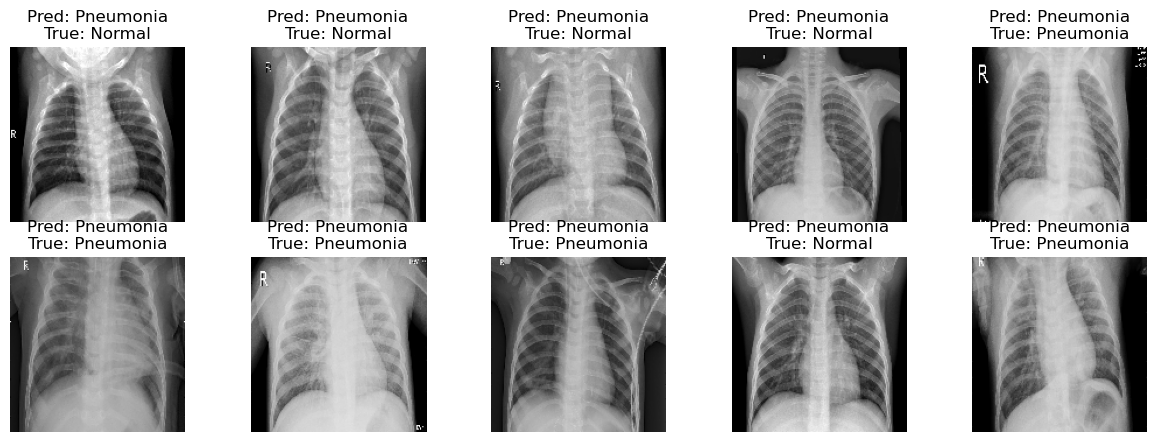

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display predictions on 10 test samples
def display_10_sample_predictions(model, test_generator, class_names):
    # Reset the generator to start from the beginning
    test_generator.reset()
    
    # Get a batch of images and labels
    x_test, y_true = next(test_gen)
    y_pred = model.predict(x_test[:10])  # Predict on the first 10 samples
    y_pred_labels = (y_pred > 0.5).astype(int).reshape(-1)  # Convert to binary labels if needed

    # Plot the 10 samples with predictions
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i])
        true_label = class_names[int(y_true[i])]
        pred_label = class_names[y_pred_labels[i]]
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis('off')
    plt.show()

# Example usage
class_names = ['Normal', 'Pneumonia']  # Adjust based on your class labels
display_10_sample_predictions(model, test_gen, class_names)
